# $t$-distributed stochastic neighbor embedding (tSNE)

Sometimes dimension reduction is performed for data visualization purposes.

## What we will accomplish

In this notebook we will:
- Introduce tSNE,
- Discuss the mathematics behind it and
- Show how to implement it in `sklearn`.

In [1]:
## For data handling
import numpy as np
import pandas as pd

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a dark background
set_style("white")

$t$-distributed stochastic neighbor embedding, or tSNE, reduces the dimension of a set of $m$ features, $X$, typically down to $2$ to $3$ dimensions for the purposes of data visualization. A primary goal of tSNE is to ensure that points close to one another in higher dimensional space are also close to one another in the lower dimensional projection. The way it does so is to estimate pairs of probability distributions in such a way as to ensure that they are as close to one another as possible. 

### The math behind tSNE

The following brief overview comes from "Visualizing Data using tSNE" by Laurens van der Maaten and Geoffrey Hinton, <a href="http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf">http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf</a>:

1. For all points $x_i$, $x_j$, convert their Euclidean distance into a conditional probability $p_{j|i}$. This is done by imagining a Gaussian distribution around $x_i$ and then comparing the "normal distance" of $x_j$ vs the sum of all other "normal distances". Here's a precise mathematical formula:
<br>
$$
p_{j|i} = \frac{\exp(-||x_i - x_j||^2/2\sigma_i^2)}{\sum_{k\neq i} \exp(-||x_i - x_k||^2/2\sigma_i^2)}
$$
<br>
Think of $p_{j|i}$ as the probability that $x_i$ would choose $x_j$ as its neighbor. We take $p_{i|i} = 0$.
<br>
<br>
2. For every point $x_i$ in high dimensional space we will have a low dimensional counterpart, $y_i$, to which we map $x_i$. Similar to $p_{j|i}$ we will have $q_{j|i}$ that gives the probability that $y_i$ would choose $y_j$ as a neighbor. Here is the precise mathematical formula they are using:
<br>
$$
q_{j|i} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k\neq i} (1 + ||y_k - y_i||^2)^{-1}}
$$
<br>
We take $q_{i|i} = 0$. Note: this is where the $t$ comes from! The numerator and denominator of $q_{j|i}$ is from the probability density for the $t$ distribution with 1 degree of freedom, <a href="https://en.wikipedia.org/wiki/Student%27s_t-distribution">https://en.wikipedia.org/wiki/Student%27s_t-distribution</a>.
<br>
<br>
3. Now if we are preserving these pairwise distances well, then we should expect $p_{j|i}$ to be close to $q_{j|i}$. In order to do this a cost function that measures the difference between $p_{j|i}$ and $q_{j|i}$ is minimized using gradient descent, specifically the <a href="https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence">Kullback–Leibler divergence (KL divergence)</a>. The optimal $y_i$s are then spit out by the algorithm.

The $\sigma_i$ in 1. above are determined based on a hyperparameter that you set prior to fitting the algorithm called the <i>perplexity</i> of the tSNE. With smaller perplexity values the algorithm tends to focus on more local behavior, while larger perplexities lead to a greater focus on more global behavior. Per their paper van der Maaten and Hinton suggest that values from $5$ to $50$ tend to work well. <i>How the perplexity can impact the results of tSNE will be touched on more thoroughly in the corresponding `Practice Problems` notebook</i>.

## Implementing in `sklearn`

We will now demonstrate how tSNE is implemented in `sklearn` by performing tSNE on the MNIST data set, <a href="https://en.wikipedia.org/wiki/MNIST_database">https://en.wikipedia.org/wiki/MNIST_database</a>, which is a data set of pixelated hand drawn digits (0-9).

In [2]:
from sklearn.datasets import load_digits

In [3]:
X,y = load_digits(return_X_y=True)

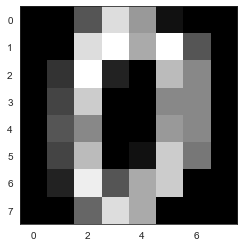

In [4]:
## An Example digit
plt.imshow(X[0,:].reshape(8,8), cmap='gray')

plt.show()

For a comparison, let's see how PCA does on this data set in 2-D.

In [5]:
## import PCA
from sklearn.decomposition import PCA

In [6]:
## Make PCA object
pca = PCA(2)

## get the transformed data
X_pca = pca.fit_transform(X)

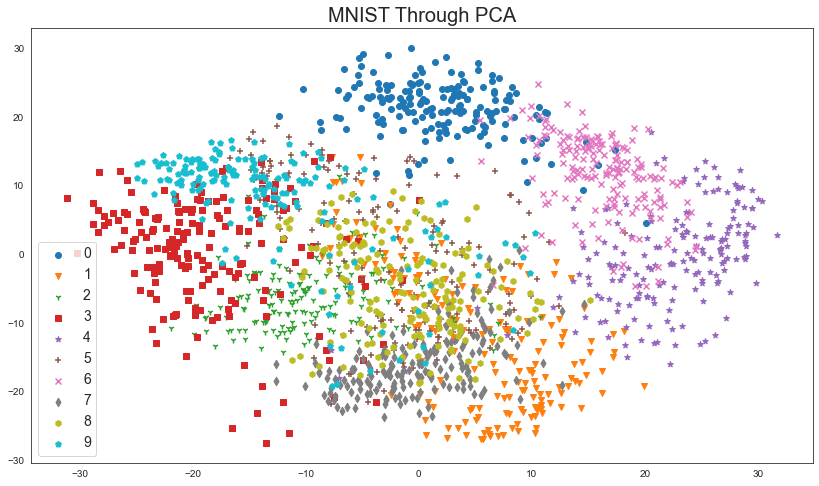

In [7]:
marker_dict = {0:'o',
                  1:'v',
                  2:'1',
                  3:'s',
                  4:'*',
                  5:'+',
                  6:'x',
                  7:'d',
                  8:'h',
                  9:'p'}

plt.figure(figsize=(16,10))

for i in range(10):
    plt.scatter(X_pca[y==i,0], 
                X_pca[y==i,1], 
                marker = marker_dict[i],
                label=i)

plt.legend(fontsize=14)
plt.title("MNIST Through PCA", fontsize=20)

plt.show()

Now we can compare this to what we find using tSNE. In `sklearn` tSNE is performed using `tSNE`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html">https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html</a>.

In [8]:
## import TSNE
from sklearn.manifold import TSNE

In [9]:
## Make the TSNE object
## the first argument sets the projection dimension
## we set init='random', this sets the initialization method
## we set learning_rate='auto', this allows the algorithm to automatically
## set the learning_rate of the algorithm
tsne = 


## get the tsne transformed data
X_tsne = tsne.fit_transform(X)

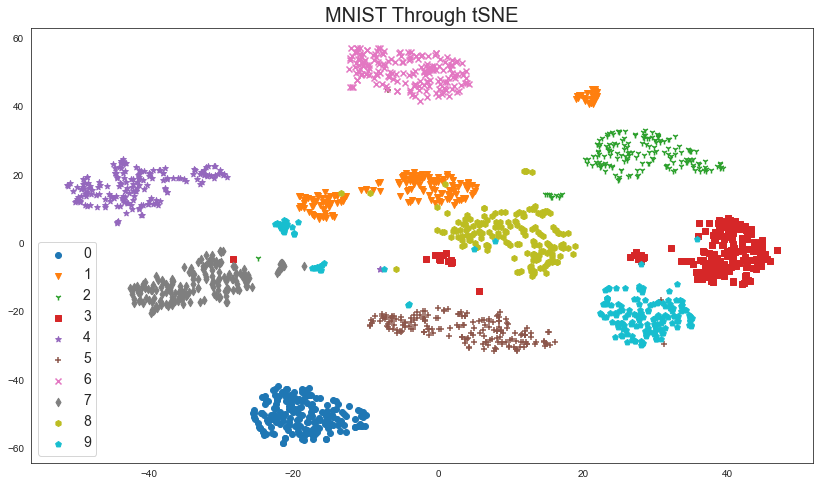

In [10]:
plt.figure(figsize=(16,10))

for i in range(10):
    plt.scatter(X_tsne[y==i,0], 
                X_tsne[y==i,1], 
                marker = marker_dict[i],
                label=i)

plt.legend(fontsize=14)
plt.title("MNIST Through tSNE", fontsize=20)

plt.show()

Much better!


## Disadvantages of tSNE

While tSNE can do a great job of preserving local features of higher dimensional data (like clustering), there are some issues with the algorithm that we should keep in mind:
- The S stands for Stochastic, meaning that your results change slightly each time.

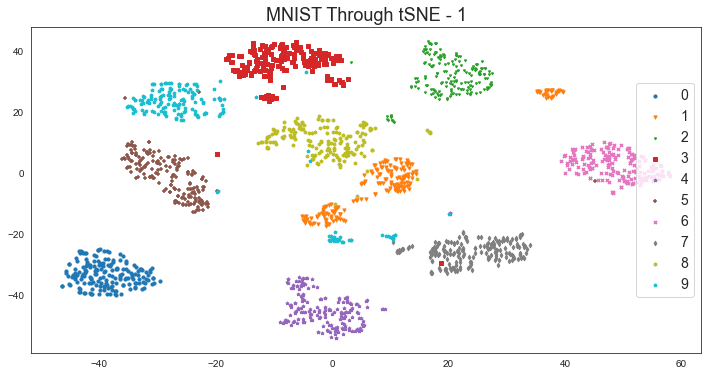

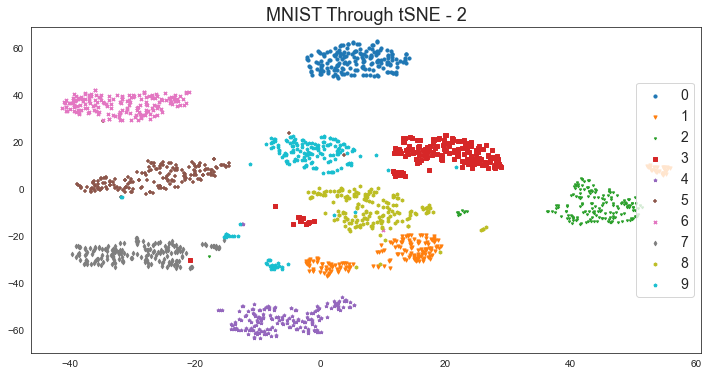

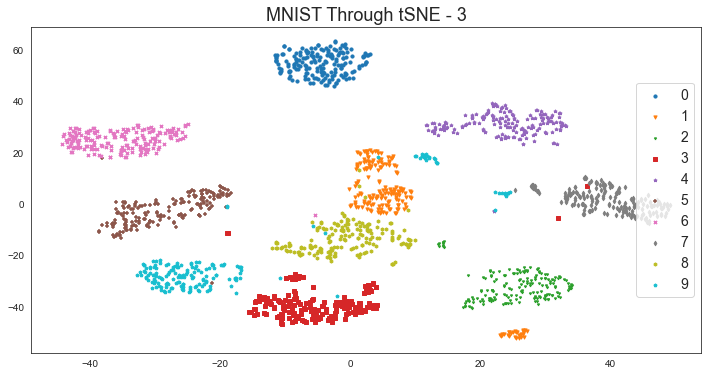

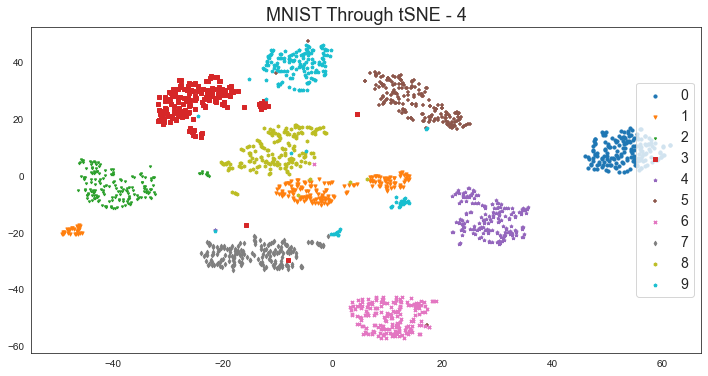

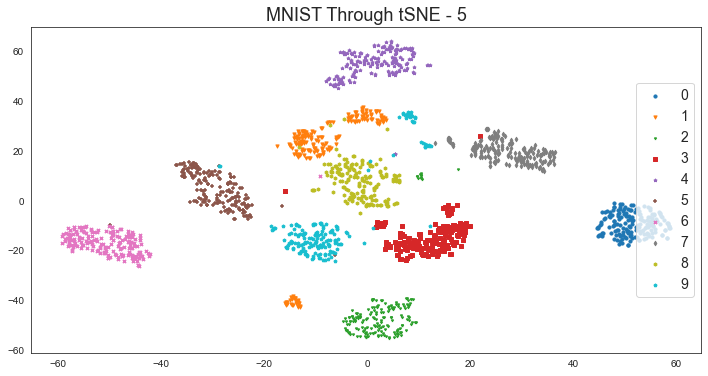

In [11]:
for j in range(5):
    tsne = TSNE(2, 
                init='random', 
                learning_rate='auto')

    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(12,6))

    for i in range(10):
        plt.scatter(X_tsne[y==i,0], 
                    X_tsne[y==i,1],
                    marker=marker_dict[i],
                    s=10,
                    label=i)

    plt.legend(fontsize=14, loc=5)
    plt.title("MNIST Through tSNE - " + str(j+1), fontsize=18)

    plt.show()

- You cannot really use this to make predictions on new data, unlike PCA there is not a procedure directly resulting from tSNE that will map new points into the lower dimensional space,
    - However, this paper from van der Maaten may be useful, <a href="https://lvdmaaten.github.io/publications/papers/AISTATS_2009.pdf">https://lvdmaaten.github.io/publications/papers/AISTATS_2009.pdf</a>,
- The magnitude of the distances between clusters shouldn't be interpreted,
- tSNE results should not be used as statistical evidence or proof of something. It is not a formal statistical test and
- Sometimes tSNE can produce clusters on data that are not actually clustered in the original data space. Thus it is good to run the data through tSNE a few different times with different perplexities to ensure that the clustering persists.

van der Maaten also has this useful FAQ post on his website here, <a href="https://lvdmaaten.github.io/tsne/">https://lvdmaaten.github.io/tsne/</a>.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)